In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [3]:
valSet = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\karan\Downloads\Plant Data\New Plant Diseases Dataset(Augmented)\Plant Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [4]:
className = valSet.class_names
print(className)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

Load Model

In [5]:
cnnModel = tf.keras.models.load_model('trained_model.keras')

Plot Test Image

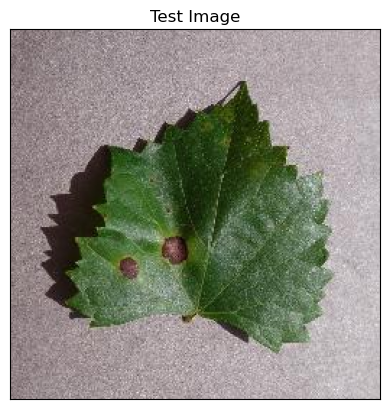

In [16]:
imagePath = r'C:\Users\karan\Downloads\Plant Data\New Plant Diseases Dataset(Augmented)\Plant Dataset\test\fc75404e-0b13-4827-8fde-b9b92be735cc___FAM_B.Rot 0330_flipLR.JPG'

img = cv2.imread(imagePath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Predicting Input

In [19]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(imagePath, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) 
predictions = cnnModel.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


In [20]:
print(predictions)

[[7.8889501e-04 9.7319891e-04 8.7977853e-05 2.4349125e-04 9.7788172e-05
  1.3984846e-04 1.5125629e-05 2.5610535e-03 1.5030816e-04 3.9510469e-06
  5.9776830e-05 1.8840589e-01 7.7127141e-01 3.2869542e-03 3.6067149e-04
  4.8632916e-08 6.9988579e-05 5.2282895e-04 9.4372913e-04 1.2282663e-04
  7.3756411e-05 1.3429612e-04 1.3654141e-04 1.6396816e-04 3.1626420e-05
  6.6382159e-04 7.1726419e-04 4.5122088e-05 6.7901332e-05 3.1211507e-03
  2.9261571e-03 3.3438213e-03 4.7091153e-03 2.1085334e-04 4.6404577e-03
  2.3689354e-03 1.2755368e-03 5.2638482e-03]]


In [21]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

12


Plotting Result

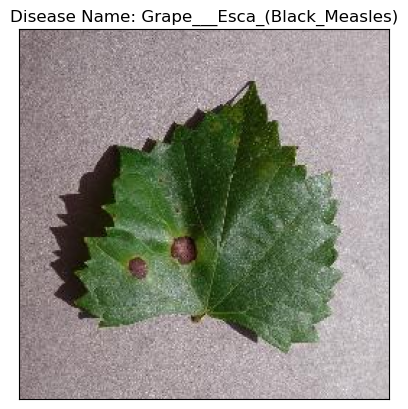

Grape___Esca_(Black_Measles)


In [23]:
model_prediction = className[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
print(model_prediction)